# Standard Epsilon Greedy _ MonteCarlo Study Results


## Approach2. Track the average reward at Each point in Time

Average Reward보는 방법은 probability ofselecting best arm보는 것보다 더 나음. 왜냐하면 많은 비슷한 best arm이 있을 때 works

,V1,V2,V3,V4,V5,V6
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,0.1,1,1,0,0,0
2,0.1,1,2,0,0,0
3,0.1,1,3,0,0,0
4,0.1,1,4,0,0,0
5,0.1,1,5,0,0,0
6,0.1,1,6,0,0,0


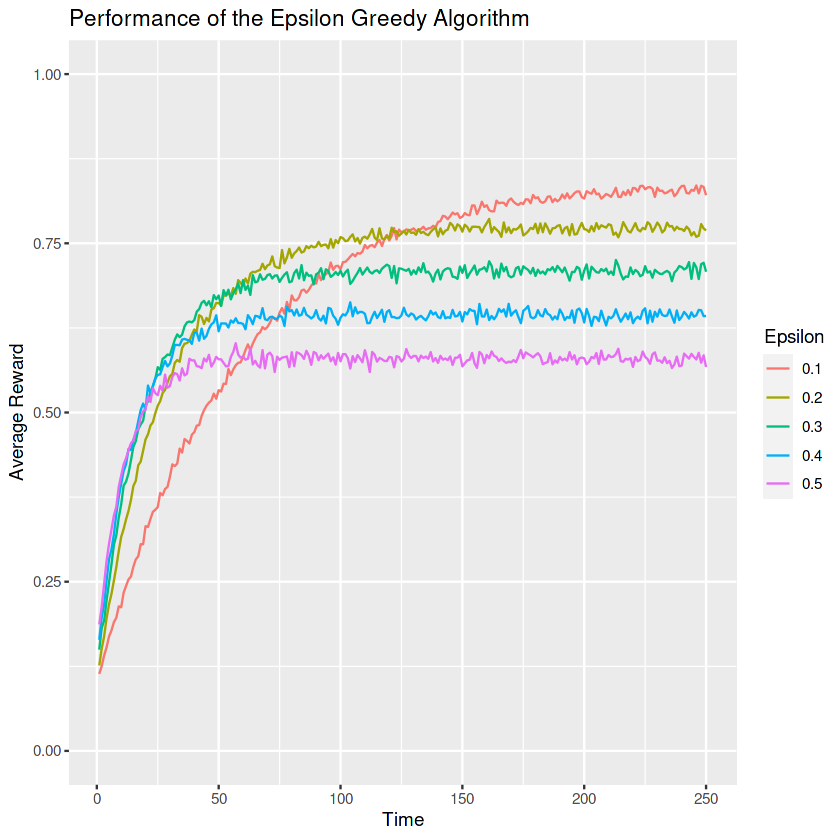

In [1]:
library("plyr")
library("ggplot2")

results <- read.csv("../input/epsilongreedy/epsilon_greedy_standard_results.tsv",sep="\t", header = FALSE)
head(results)
names(results) <- c("Epsilon", "Sim", "T", "ChosenArm", "Reward", "CumulativeReward")
results <- transform(results, Epsilon = factor(Epsilon))

# Plot average reward as a function of time.
stats <- ddply(results,
               c("Epsilon", "T"),
               function (df) {mean(df$Reward)})
ggplot(stats, aes(x = T, y = V1, group = Epsilon, color = Epsilon)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Average Reward") +
  ggtitle("Performance of the Epsilon Greedy Algorithm")
#gsave("r/graphs/standard_epsilon_greedy_average_reward.pdf")


## Approach1. Plot frequency of selecting correct arm as a function of time.

### In here best arm is 2

만약 best arm을 고를 확률이 시간이 지남에 따라 증가하지 않으면 알고리즘이 배우고 있다고 할 수 없는데,

어떤 입실론 이든지 증가하는 그래프를 그리므로, arm들의 값에 대해서 learning하고 있다고 할 수 있음

### 그래프그리기
- x axis : the number of tiems the algorithm has been able to pull on any of the five arms that are available.
- y axis : the probability that the algorithm, when we call selected_arm(), chose the best of the five arms at each point in time.

the actual value of the curves are the average across teh 5000 simulations we ran to estimate the algorithms perfomance

we need to run 5000 simulations to get around the amount of noise in each simulation caused by using a random number generator in our simulations.


### 결론 해석
1) 입실론이 크면 탐색을 많이 함. 

  따라서 초반에 가장 빠르게 증가하지만 peak out.
 
  the setting that lead to lots of exploration learn quickly, but do Not exploit often enough at the end
  
2) 입실론이 작으면 탐색을 적게 하고 exploit을 많이 함.

   초반에 가장 증가하는 속도 느리지만, 뒤에 가서는 가장 높은 퍼포먼스를 보임
   
   the settings that lead to littl eexploration learn slowly, but do well at the end.




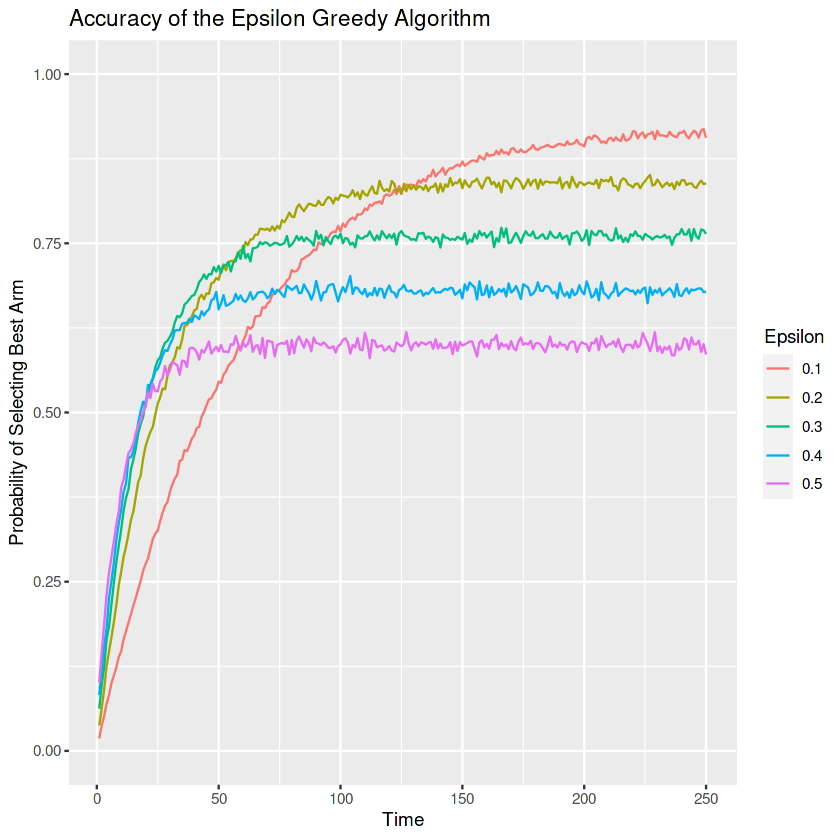

In [2]:
# Plot frequency of selecting correct arm as a function of time.
# In this instance, 2 is the correct arm.
stats <- ddply(results,
               c("Epsilon", "T"),
               function (df) {mean(df$ChosenArm == 2)})
ggplot(stats, aes(x = T, y = V1, group = Epsilon, color = Epsilon)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Probability of Selecting Best Arm") +
  ggtitle("Accuracy of the Epsilon Greedy Algorithm")
#ggsave("r/graphs/standard_epsilon_greedy_average_accuracy.pdf")

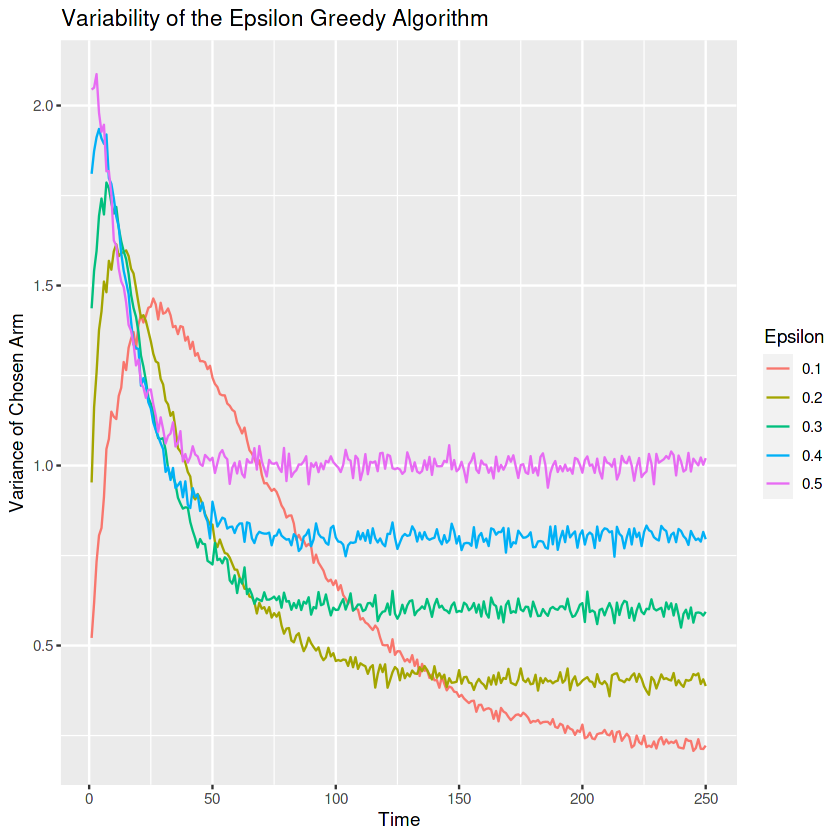

In [3]:
# Plot variance of chosen arms as a function of time.
stats <- ddply(results,
               c("Epsilon", "T"),
               function (df) {var(df$ChosenArm)})
ggplot(stats, aes(x = T, y = V1, group = Epsilon, color = Epsilon)) +
  geom_line() +
  xlab("Time") +
  ylab("Variance of Chosen Arm") +
  ggtitle("Variability of the Epsilon Greedy Algorithm")
#ggsave("r/graphs/standard_epsilon_greedy_variance_choices.pdf")


## Approach3. Track the Cumulative Reward at Each pint in Time

위에 접근법 2가지는 단순히 지협적인 퍼포먼스에만 초점을 두기 때문에 오랜 기간 동안 알고리즘 성능이 어떻게 좋아지는지 보지 못함.

예를 들어 입실론이 큰 , 즉 탐색을 많이하는 입실론 그리디 알고리즘 같은건
처음에만 성능 좋은데 ...

따라서 각 시점의 reward 평균을 보는 것이 아니라 cumulative reward 볼것임. 

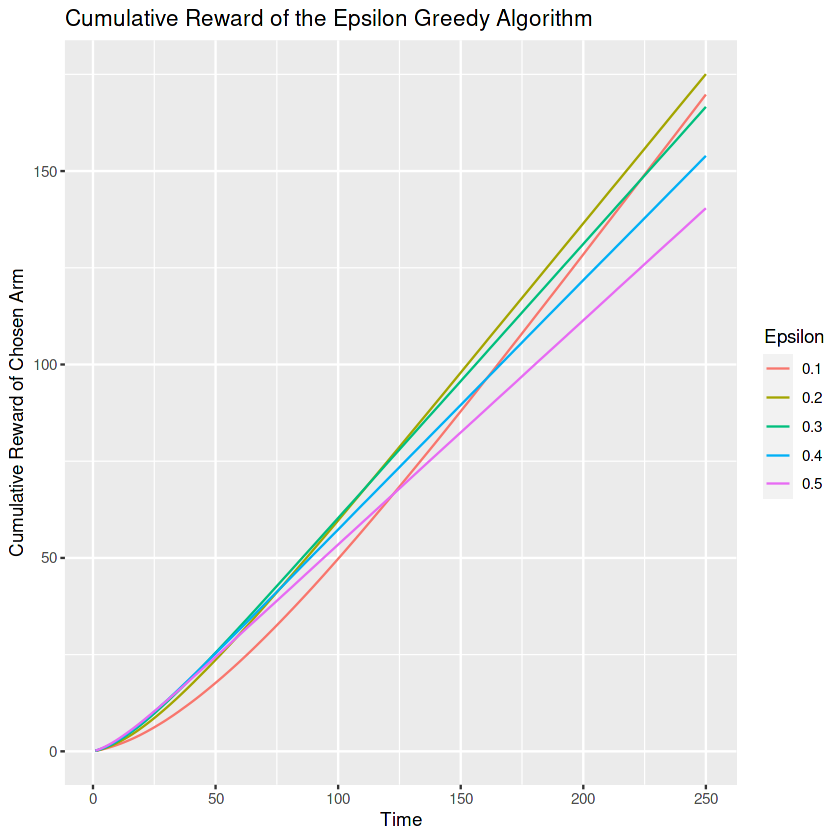

In [4]:
# Plot cumulative reward as a function of time.
stats <- ddply(results,
               c("Epsilon", "T"),
               function (df) {mean(df$CumulativeReward)})
ggplot(stats, aes(x = T, y = V1, group = Epsilon, color = Epsilon)) +
  geom_line() +
  xlab("Time") +
  ylab("Cumulative Reward of Chosen Arm") +
  ggtitle("Cumulative Reward of the Epsilon Greedy Algorithm")
#ggsave("r/graphs/standard_epsilon_greedy_cumulative_reward.pdf")